In [ ]:
!freebayes-parallel \
<(fasta_generate_regions.py /home/amogus/bread_wheat/reference/CS_v2.1.fna.fai 1000000) 17 \
-f /home/amogus/bread_wheat/reference/CS_v2.1.fna \
-n 4 --min-alternate-qsum 30 --min-coverage 10 --limit-coverage 1000 \
--binomial-obs-priors-off --allele-balance-priors-off --ploidy 2 --hwe-priors-off --no-population-priors \
merge_bowtie2/bread_wheat_merge.bam > freebayes/bread_wheat.vcf


Academic tradition requires you to cite works you base your article on.
When using programs that use GNU Parallel to process data for publication
please cite:

  O. Tange (2011): GNU Parallel - The Command-Line Power Tool,
  ;login: The USENIX Magazine, February 2011:42-47.

This helps funding further development; AND IT WON'T COST YOU A CENT.
If you pay 10000 EUR you should feel free to use GNU Parallel without citing.

To silence the citation notice: run 'parallel --citation'.



In [108]:
!samtools index -c YGS_merged_with_bad.bam -@ 10

## START FILTERING

In [1]:
!plink2 --vcf freebayes/bread_wheat.vcf --allow-extra-chr --snps-only --max-alleles 2 \
--min-alleles 2 --export vcf --out filt/bread_snps

PLINK v2.00a5.12LM 64-bit Intel (25 Jun 2024)  www.cog-genomics.org/plink/2.0/
(C) 2005-2024 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to filt/bread_snps.log.
Options in effect:
  --allow-extra-chr
  --export vcf
  --max-alleles 2
  --min-alleles 2
  --out filt/bread_snps
  --snps-only
  --vcf freebayes/bread_wheat.vcf

Start time: Wed Oct 23 10:53:27 2024
64239 MiB RAM detected, ~49750 available; reserving 32119 MiB for main
workspace.
Using up to 24 threads (change this with --threads).
--vcf: 4287075 variants scanned.
--vcf: filt/bread_snps-temporary.pgen + filt/bread_snps-temporary.pvar.zst +
filt/bread_snps-temporary.psam written.
183 samples (0 females, 0 males, 183 ambiguous; 183 founders) loaded from
filt/bread_snps-temporary.psam.
3811623 out of 4287075 variants loaded from filt/bread_snps-temporary.pvar.zst.
Note: No phenotype data present.
3811623 variants remaining after main filters.
--export vcf to filt/bread_snps.vcf ... 1010111112121313141

In [2]:
!grep -v "#" -c  filt/bread_snps.vcf

3811623


In [3]:
!grep -v "#" -c freebayes/bread_wheat.vcf

4287075


In [4]:
!sed -i 's/^##fileformat=VCFv4.3/##fileformat=VCFv4.2/' filt/bread_snps.vcf

## missing site for raw data

In [ ]:
!vcftools --vcf filt/bread_snps.vcf --missing-site --out filt/missrate_raw


VCFtools - 0.1.16
(C) Adam Auton and Anthony Marcketta 2009

Parameters as interpreted:
	--vcf filt/bread_snps.vcf
	--out filt/missrate_raw
	--missing-site

After filtering, kept 183 out of 183 Individuals
Outputting Site Missingness


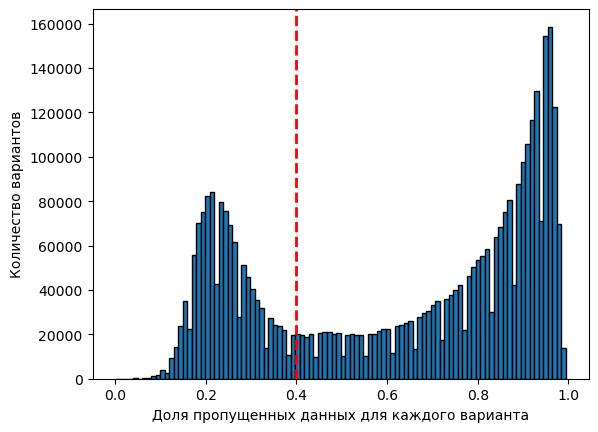

In [8]:
import numpy as np
import matplotlib.pyplot as plt

# Загрузим данные из файла
data = np.genfromtxt('filt/missrate_raw.lmiss', delimiter='\t', skip_header=1, usecols=-1)

# Построим гистограмму с 100 бинами
plt.hist(data, bins=100, edgecolor='black')

# Добавим подписи к осям и заголовок
#plt.xlabel('% of Missing Data (F_MISS)')
plt.ylabel('Количество вариантов')
plt.xlabel('Доля пропущенных данных для каждого варианта')
plt.axvline(x=0.4, color='red', linestyle='--', linewidth=2)
# Отобразим гистограмму
plt.show()


In [9]:
!plink2 --vcf filt/bread_snps.vcf  --out filt/bread_snps_04geno \
--allow-extra-chr --geno 0.4 --export vcf

PLINK v2.00a5.12LM 64-bit Intel (25 Jun 2024)  www.cog-genomics.org/plink/2.0/
(C) 2005-2024 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to filt/bread_snps_04geno.log.
Options in effect:
  --allow-extra-chr
  --export vcf
  --geno 0.4
  --out filt/bread_snps_04geno
  --vcf filt/bread_snps.vcf

Start time: Wed Oct 23 11:01:47 2024
64239 MiB RAM detected, ~49539 available; reserving 32119 MiB for main
workspace.
Using up to 24 threads (change this with --threads).
--vcf: 3811623 variants scanned.
--vcf: filt/bread_snps_04geno-temporary.pgen +
filt/bread_snps_04geno-temporary.pvar.zst +
filt/bread_snps_04geno-temporary.psam written.
183 samples (0 females, 0 males, 183 ambiguous; 183 founders) loaded from
filt/bread_snps_04geno-temporary.psam.
3811623 variants loaded from filt/bread_snps_04geno-temporary.pvar.zst.
Note: No phenotype data present.
Calculating allele frequencies... 101213151718202224252729303234363739414244464849515355565860616365676870727375777

In [11]:
!grep -c -v "#" filt/bread_snps_04geno.vcf 

1196126


In [10]:
!sed -i 's/^##fileformat=VCFv4.3/##fileformat=VCFv4.2/' filt/bread_snps_04geno.vcf

## missing individs for raw data

In [14]:
!vcftools --vcf filt/bread_snps.vcf --missing-indv --out filt/missrate_mind_raw


VCFtools - 0.1.16
(C) Adam Auton and Anthony Marcketta 2009

Parameters as interpreted:
	--vcf filt/bread_snps.vcf
	--missing-indv
	--out filt/missrate_mind_raw

After filtering, kept 183 out of 183 Individuals
Outputting Individual Missingness
After filtering, kept 3811623 out of a possible 3811623 Sites
Run Time = 150.00 seconds


In [18]:
!cat filt/missrate_mind_raw.imiss

INDV	N_DATA	N_GENOTYPES_FILTERED	N_MISS	F_MISS
PAO_3_001	3811623	0	2365277	0.620543
PAO_3_002	3811623	0	3367518	0.883487
PAO_3_003	3811623	0	2353207	0.617377
PAO_3_004	3811623	0	1940325	0.509055
PAO_3_005	3811623	0	2131930	0.559323
PAO_3_006	3811623	0	2085987	0.54727
PAO_3_007	3811623	0	1941035	0.509241
PAO_3_008	3811623	0	1850886	0.48559
PAO_3_009	3811623	0	2624302	0.6885
PAO_3_010	3811623	0	3552330	0.931973
PAO_3_011	3811623	0	2202513	0.577841
PAO_3_012	3811623	0	1657221	0.434781
PAO_3_013	3811623	0	2369793	0.621728
PAO_3_014	3811623	0	2529428	0.663609
PAO_3_015	3811623	0	2283833	0.599176
PAO_3_016	3811623	0	2277571	0.597533
PAO_3_017	3811623	0	2348037	0.61602
PAO_3_018	3811623	0	3473235	0.911222
PAO_3_019	3811623	0	2377249	0.623684
PAO_3_020	3811623	0	3010407	0.789797
PAO_3_021	3811623	0	2096228	0.549957
PAO_3_022	3811623	0	2086544	0.547416
PAO_3_023	3811623	0	1775703	0.465865
PAO_3_024	3811623	0	2014702	0.528568
PAO_3_025	3811623	0	1992531	0.522751
PAO_3_026	3811623	0	3285130	0.861

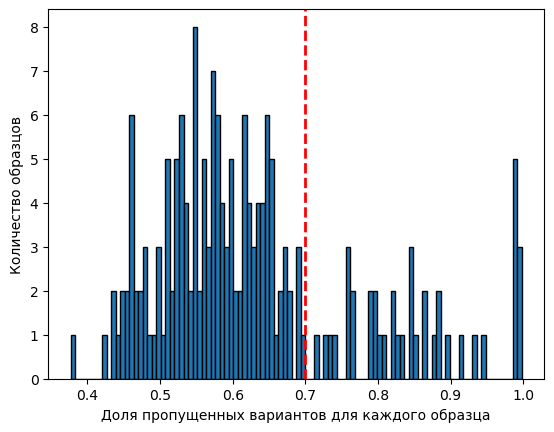

In [17]:
import numpy as np
import matplotlib.pyplot as plt

# Загрузим данные из файла
data = np.genfromtxt('filt/missrate_mind_raw.imiss', delimiter='\t', skip_header=1, usecols=-1)

# Построим гистограмму с 100 бинами
plt.hist(data, bins=100, edgecolor='black')

# Добавим подписи к осям и заголовок
plt.xlabel('Доля пропущенных вариантов для каждого образца')
plt.ylabel('Количество образцов')
plt.axvline(x=0.7, color='red', linestyle='--', linewidth=2)
#plt.title('Histogram of % Missing Data per Ind')

# Отобразим гистограмму
plt.show()

## missing individs for filt data (0.4 missing site)

In [19]:
!vcftools --vcf filt/bread_snps_04geno.vcf --missing-indv --out filt/missrate_mind_04geno


VCFtools - 0.1.16
(C) Adam Auton and Anthony Marcketta 2009

Parameters as interpreted:
	--vcf filt/bread_snps_04geno.vcf
	--missing-indv
	--out filt/missrate_mind_04geno

After filtering, kept 183 out of 183 Individuals
Outputting Individual Missingness
After filtering, kept 1196126 out of a possible 1196126 Sites
Run Time = 48.00 seconds


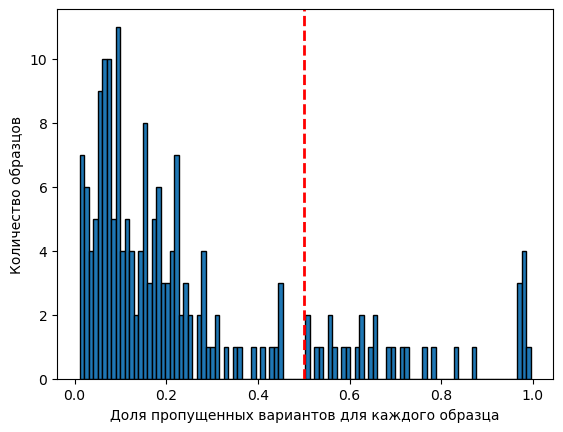

In [21]:
import numpy as np
import matplotlib.pyplot as plt

# Загрузим данные из файла
data = np.genfromtxt('filt/missrate_mind_04geno.imiss', delimiter='\t', skip_header=1, usecols=-1)

# Построим гистограмму с 100 бинами
plt.hist(data, bins=100, edgecolor='black')

# Добавим подписи к осям и заголовок
plt.xlabel('Доля пропущенных вариантов для каждого образца')
plt.ylabel('Количество образцов')
plt.axvline(x=0.5, color='red', linestyle='--', linewidth=2)
#plt.title('Histogram of % Missing Data per Ind')

# Отобразим гистограмму
plt.show()

In [23]:
!plink2 --vcf filt/bread_snps_04geno.vcf \
--out filt/bread_snps_04geno05mind --allow-extra-chr --mind 0.5 --export vcf

PLINK v2.00a5.12LM 64-bit Intel (25 Jun 2024)  www.cog-genomics.org/plink/2.0/
(C) 2005-2024 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to filt/bread_snps_04geno05mind.log.
Options in effect:
  --allow-extra-chr
  --export vcf
  --mind 0.5
  --out filt/bread_snps_04geno05mind
  --vcf filt/bread_snps_04geno.vcf

Start time: Wed Oct 23 11:30:44 2024
64239 MiB RAM detected, ~49661 available; reserving 32119 MiB for main
workspace.
Using up to 24 threads (change this with --threads).
--vcf: 1196126 variants scanned.
--vcf: filt/bread_snps_04geno05mind-temporary.pgen +
filt/bread_snps_04geno05mind-temporary.pvar.zst +
filt/bread_snps_04geno05mind-temporary.psam written.
183 samples (0 females, 0 males, 183 ambiguous; 183 founders) loaded from
filt/bread_snps_04geno05mind-temporary.psam.
1196126 variants loaded from filt/bread_snps_04geno05mind-temporary.pvar.zst.
Note: No phenotype data present.
Calculating sample missingness rates... 10162127323843495460657176

In [24]:
!sed -i 's/^##fileformat=VCFv4.3/##fileformat=VCFv4.2/' filt/bread_snps_04geno05mind.vcf

In [25]:
!vcftools --vcf filt/bread_snps_04geno05mind.vcf --freq \
--out filt/bread_snps_04geno05mind_freq


VCFtools - 0.1.16
(C) Adam Auton and Anthony Marcketta 2009

Parameters as interpreted:
	--vcf filt/bread_snps_04geno05mind.vcf
	--freq
	--out filt/bread_snps_04geno05mind_freq

After filtering, kept 152 out of 152 Individuals
Outputting Frequency Statistics...
After filtering, kept 1196126 out of a possible 1196126 Sites
Run Time = 45.00 seconds


In [27]:
import csv

# Функция для вычисления MAF с учетом двух столбцов
def calculate_maf(freq_str_1, freq_str_2):
    # Объединяем частоты из двух столбцов
    alleles_1 = freq_str_1.split()  # Разделяем строку по пробелам
    alleles_2 = freq_str_2.split()  # Разделяем строку по пробелам
    # Извлекаем частоты из каждого столбца
    frequencies = [float(allele.split(':')[1]) for allele in alleles_1 + alleles_2]
    # Поиск минорной частоты
    maf = min(frequencies)
    
    return maf

# Открытие файла с частотами аллелей
with open('filt/bread_snps_04geno05mind_freq.frq', 'r') as infile, \
    open('filt/bread_snps_04geno05mind_freq.maf', 'w', newline='') as outfile:
    # Чтение заголовков (включая столбец None)
    reader = csv.DictReader(infile, delimiter='\t')
    
    # Переопределяем заголовки, добавляя имя для шестого столбца
    fieldnames = reader.fieldnames
    fieldnames.append('ALLELE_FREQ_2')  # Назначаем имя шестому столбцу
    
    # Переоткрываем файл с новыми заголовками
    infile.seek(0)  # Возвращаем указатель в начало файла
    reader = csv.DictReader(infile, delimiter='\t', fieldnames=fieldnames)
    
    # Пропуск заголовка, если переопределяем
    next(reader)
    
    # Запись заголовка для выходного файла
    writer = csv.writer(outfile)
    writer.writerow(['CHROM', 'POS', 'MAF'])

    for row in reader:
        chrom = row['CHROM']
        pos = row['POS']
        freq_str_1 = row['{ALLELE:FREQ}']  # Частоты аллелей из 5-го столбца
        freq_str_2 = row['ALLELE_FREQ_2']  # Частоты аллелей из переименованного столбца
        
        #
  
        # Вычисление MAF
        maf = calculate_maf(freq_str_1, freq_str_2)
        
        # Запись результатов в выходной файл
        writer.writerow([chrom, pos, maf])


In [28]:
!head filt/bread_snps_04geno05mind_freq.maf

CHROM,POS,MAF
Chr1A,701193,0.0
Chr1A,701197,0.0133929
Chr1A,701218,0.0
Chr1A,701233,0.0
Chr1A,701246,0.0
Chr1A,701295,0.00446429
Chr1A,701315,0.0
Chr1A,701321,0.00446429
Chr1A,701327,0.00446429


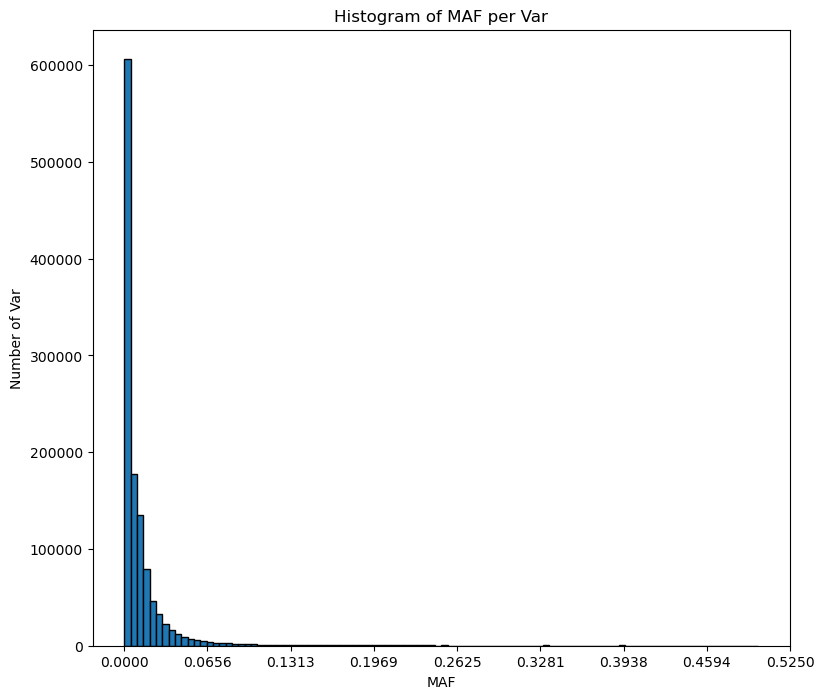

In [29]:
import numpy as np
import matplotlib.pyplot as plt

# Загрузим данные из файла
data = np.genfromtxt('filt/bread_snps_04geno05mind_freq.maf', delimiter=',', skip_header=1, usecols=-1)
plt.figure(figsize=(9, 8))
# Построим гистограмму с 100 бинами
plt.hist(data, bins=100, edgecolor='black')

# Добавим подписи к осям и заголовок
plt.xlabel('MAF')
plt.ylabel('Number of Var')
plt.title('Histogram of MAF per Var')
xmin, xmax = plt.xlim()
xticks = np.linspace(0, xmax, num=9)  # Здесь num определяет количество меток на оси X

# Зададим метки на оси X
plt.xticks(xticks)  # Вы можете изменить угол вращения меток, если это необходимо
# Отобразим гистограмму
plt.show()

In [31]:
!vcftools --vcf filt/bread_snps_04geno05mind.vcf --maf 0.05 \
--recode --recode-INFO-all --out filt/bread_snps_04geno05mind_freq_maf005


VCFtools - 0.1.16
(C) Adam Auton and Anthony Marcketta 2009

Parameters as interpreted:
	--vcf filt/bread_snps_04geno05mind.vcf
	--recode-INFO-all
	--maf 0.05
	--out filt/bread_snps_04geno05mind_freq_maf005
	--recode

After filtering, kept 152 out of 152 Individuals
Outputting VCF file...
After filtering, kept 59883 out of a possible 1196126 Sites
Run Time = 50.00 seconds


In [32]:
!plink2 --vcf filt/bread_snps_04geno05mind_freq_maf005.recode.vcf --allow-extra-chr --geno-counts \
--out filt/snp_geno

PLINK v2.00a5.12LM 64-bit Intel (25 Jun 2024)  www.cog-genomics.org/plink/2.0/
(C) 2005-2024 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to filt/snp_geno.log.
Options in effect:
  --allow-extra-chr
  --geno-counts
  --out filt/snp_geno
  --vcf filt/bread_snps_04geno05mind_freq_maf005.recode.vcf

Start time: Wed Oct 23 11:36:42 2024
64239 MiB RAM detected, ~49636 available; reserving 32119 MiB for main
workspace.
Using up to 24 threads (change this with --threads).
--vcf: 59883 variants scanned.
--vcf: filt/snp_geno-temporary.pgen + filt/snp_geno-temporary.pvar.zst +
filt/snp_geno-temporary.psam written.
152 samples (0 females, 0 males, 152 ambiguous; 152 founders) loaded from
filt/snp_geno-temporary.psam.
59883 variants loaded from filt/snp_geno-temporary.pvar.zst.
Note: No phenotype data present.
Calculating allele frequencies... done.
--geno-counts: Genotype counts written to filt/snp_geno.gcount .2222323242425252626272728282929303031313232333334343535363

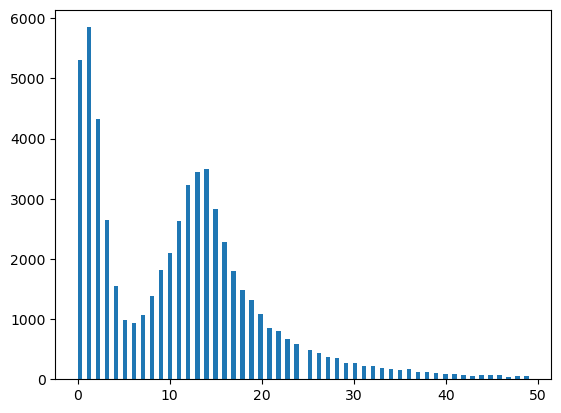

In [33]:
import matplotlib.pyplot as plt

het_counts = []
with open('filt/snp_geno.gcount') as inpf:
    for l in inpf.readlines():
        l = l.strip()
        if l.startswith('#'):
            continue
        else:
            het_counts.append(int(l.split('\t')[5]))

plt.hist([i for i in het_counts if i < 50], bins=100);

In [34]:
!head filt/snp_geno.gcount

#CHROM	ID	REF	ALT	HOM_REF_CT	HET_REF_ALT_CTS	TWO_ALT_GENO_CTS	HAP_REF_CT	HAP_ALT_CTS	MISSING_CT
Chr1A	.	G	T	47	3	64	0	0	38
Chr1A	.	A	G	86	1	27	0	0	38
Chr1A	.	A	G	47	3	64	0	0	38
Chr1A	.	C	G	86	1	27	0	0	38
Chr1A	.	C	G	103	0	11	0	0	38
Chr1A	.	G	A	95	2	34	0	0	21
Chr1A	.	A	G	110	4	27	0	0	11
Chr1A	.	C	T	97	3	31	0	0	21
Chr1A	.	T	A	99	4	28	0	0	21


In [42]:
!awk -v FS='\t' '$0 !~ /#/ && $5 > 0 && ($6 / ($5 + $6 + $7)) <= 0.05 0 && $7 > 0 {print $0}' filt/snp_geno.gcount | wc -l

21188


In [43]:
!awk -v FS='\t' '$0 !~ /#/ && $5 > 0 && ($6 / ($5 + $6 + $7)) <= 0.05 0 && $7 > 0 {print $0}' \
filt/snp_geno.gcount > filt/lowhet

In [44]:
!plink2 --vcf filt/bread_snps_04geno05mind_freq_maf005.recode.vcf --allow-extra-chr \
--extract filt/lowhet --export vcf --out filt/bread_lowhet

PLINK v2.00a5.12LM 64-bit Intel (25 Jun 2024)  www.cog-genomics.org/plink/2.0/
(C) 2005-2024 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to filt/bread_lowhet.log.
Options in effect:
  --allow-extra-chr
  --export vcf
  --extract filt/lowhet
  --out filt/bread_lowhet
  --vcf filt/bread_snps_04geno05mind_freq_maf005.recode.vcf

Start time: Wed Oct 23 11:44:26 2024
64239 MiB RAM detected, ~49642 available; reserving 32119 MiB for main
workspace.
Using up to 24 threads (change this with --threads).
--vcf: 59883 variants scanned.
--vcf: filt/bread_lowhet-temporary.pgen + filt/bread_lowhet-temporary.pvar.zst
+ filt/bread_lowhet-temporary.psam written.
152 samples (0 females, 0 males, 152 ambiguous; 152 founders) loaded from
filt/bread_lowhet-temporary.psam.
59883 variants loaded from filt/bread_lowhet-temporary.pvar.zst.
Note: No phenotype data present.
--extract: 59883 variants remaining.
59883 variants remaining after main filters.
--export vcf to filt/bread_lo

In [101]:
!sed -i 's/^##fileformat=VCFv4.3/##fileformat=VCFv4.2/' ../filtering_with_bad/GBS_YGS_lowhet.vcf

In [46]:
!bcftools annotate --set-id +'%CHROM\_%POS\_%REF\_%FIRST_ALT' filt/bread_lowhet.vcf > filt/bread_lowhet_id.vcf

In [47]:
!plink2 --vcf filt/bread_lowhet_id.vcf --allow-extra-chr --indep-pairwise 50 5 0.2 --out filt/snp_pairwise

PLINK v2.00a5.12LM 64-bit Intel (25 Jun 2024)  www.cog-genomics.org/plink/2.0/
(C) 2005-2024 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to filt/snp_pairwise.log.
Options in effect:
  --allow-extra-chr
  --indep-pairwise 50 5 0.2
  --out filt/snp_pairwise
  --vcf filt/bread_lowhet_id.vcf

Start time: Wed Oct 23 11:52:59 2024
64239 MiB RAM detected, ~49621 available; reserving 32119 MiB for main
workspace.
Using up to 24 threads (change this with --threads).
--vcf: 59883 variants scanned.
--vcf: filt/snp_pairwise-temporary.pgen + filt/snp_pairwise-temporary.pvar.zst
+ filt/snp_pairwise-temporary.psam written.
152 samples (0 females, 0 males, 152 ambiguous; 152 founders) loaded from
filt/snp_pairwise-temporary.psam.
59883 variants loaded from filt/snp_pairwise-temporary.pvar.zst.
Note: No phenotype data present.
Calculating allele frequencies... done.
--indep-pairwise (19 compute threads): 5022495/59883 variants removed.
Variant lists written to filt/snp_pair

In [48]:
!plink2 --vcf filt/bread_lowhet_id.vcf --allow-extra-chr \
--extract filt/snp_pairwise.prune.in --export vcf --out filt/snp_het_LD_thin

PLINK v2.00a5.12LM 64-bit Intel (25 Jun 2024)  www.cog-genomics.org/plink/2.0/
(C) 2005-2024 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to filt/snp_het_LD_thin.log.
Options in effect:
  --allow-extra-chr
  --export vcf
  --extract filt/snp_pairwise.prune.in
  --out filt/snp_het_LD_thin
  --vcf filt/bread_lowhet_id.vcf

Start time: Wed Oct 23 11:53:47 2024
64239 MiB RAM detected, ~49620 available; reserving 32119 MiB for main
workspace.
Using up to 24 threads (change this with --threads).
--vcf: 59883 variants scanned.
--vcf: filt/snp_het_LD_thin-temporary.pgen +
filt/snp_het_LD_thin-temporary.pvar.zst + filt/snp_het_LD_thin-temporary.psam
written.
152 samples (0 females, 0 males, 152 ambiguous; 152 founders) loaded from
filt/snp_het_LD_thin-temporary.psam.
59883 variants loaded from filt/snp_het_LD_thin-temporary.pvar.zst.
Note: No phenotype data present.
--extract: 37388 variants remaining.
37388 variants remaining after main filters.
--export vcf to filt